# NYC Taxi Data February - March 2019 Analysis 

## Objective
NYC taxi trip data for month of February and March 2019:
- Trip volume patterns
- Typical trip durations
- Shared ride usage
- Popular pickup zones

## Load the collected data and import the libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import pandas for data manipulation and load the dataset

df = pd.read_csv("/Users/charmainevinarta/Documents/Portfolio/taxi2019data.csv")

## Initial Data Exploration
Before starting the analysis, let's take a quick look at the data to understand its structure, types, and to identify any missing values, NaNs, strange values, weird data types.

In [3]:
# Preview the first few rows to understand the data structure

df.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0005,B02510,02/12/2019 11:10:30 AM,02/12/2019 11:19:14 AM,80,112,NaN
1,HV0005,B02510,02/12/2019 11:35:27 AM,02/12/2019 11:54:29 AM,256,125,NaN
2,HV0003,B02867,02/12/2019 11:03:14 AM,02/12/2019 11:21:04 AM,210,155,1.0
3,HV0003,B02867,02/12/2019 11:12:12 AM,02/12/2019 11:24:40 AM,155,155,1.0
4,HV0003,B02867,02/12/2019 11:50:05 AM,02/12/2019 11:59:14 AM,155,91,NaN


In [4]:
# Summary of the dataframe: columns, data types, and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hvfhs_license_num     200000 non-null  object 
 1   dispatching_base_num  199997 non-null  object 
 2   pickup_datetime       200000 non-null  object 
 3   dropoff_datetime      200000 non-null  object 
 4   PULocationID          200000 non-null  int64  
 5   DOLocationID          200000 non-null  int64  
 6   SR_Flag               43576 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 10.7+ MB


In [5]:
# Basic statistics for numerical columns to understand distribution
# PU is for PickUp & DO for Drop off

df.describe()

,PULocationID,DOLocationID,SR_Flag
count,200000.00000,200000.000000,43576.0
mean,139.12851,141.398060,1.0
std,75.22699,77.294184,0.0
min,1.00000,1.000000,1.0
25%,75.00000,75.000000,1.0
50%,141.00000,141.000000,1.0
75%,211.00000,216.000000,1.0
max,265.00000,265.000000,1.0


In [6]:
# Checking for missing values for each column

df.isnull().sum()

hvfhs_license_num            0
dispatching_base_num         3
pickup_datetime              0
dropoff_datetime             0
PULocationID                 0
DOLocationID                 0
SR_Flag                 156424
dtype: int64

## Clean & prepare the data for data wrangling

In [7]:
# Convert pickup and dropoff times from string to datetime

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

In [8]:
# Fill missing dispatching_base_num with a placeholder string

df['dispatching_base_num'] = df['dispatching_base_num'].fillna("UNKNOWN")

In [9]:
# Fill missing SR_Flag with 0 (meaning not a shared ride), then convert to int

df['SR_Flag'] = df['SR_Flag'].fillna(0).astype(int)

In [10]:
# Create a new column for trip duration in minutes

df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

In [11]:
# Quick check after cleaning

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   hvfhs_license_num     200000 non-null  object        
 1   dispatching_base_num  200000 non-null  object        
 2   pickup_datetime       200000 non-null  datetime64[ns]
 3   dropoff_datetime      200000 non-null  datetime64[ns]
 4   PULocationID          200000 non-null  int64         
 5   DOLocationID          200000 non-null  int64         
 6   SR_Flag               200000 non-null  int64         
 7   trip_duration         200000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 12.2+ MB
None


,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,trip_duration
0,HV0005,B02510,2019-02-12 11:10:30,2019-02-12 11:19:14,80,112,0,8.733333
1,HV0005,B02510,2019-02-12 11:35:27,2019-02-12 11:54:29,256,125,0,19.033333
2,HV0003,B02867,2019-02-12 11:03:14,2019-02-12 11:21:04,210,155,1,17.833333
3,HV0003,B02867,2019-02-12 11:12:12,2019-02-12 11:24:40,155,155,1,12.466667
4,HV0003,B02867,2019-02-12 11:50:05,2019-02-12 11:59:14,155,91,0,9.150000


## Explore and visualize, exploring data analysis
After cleaning the data, try understand the key patterns, distributions, and trends.

## Trip volume by month?

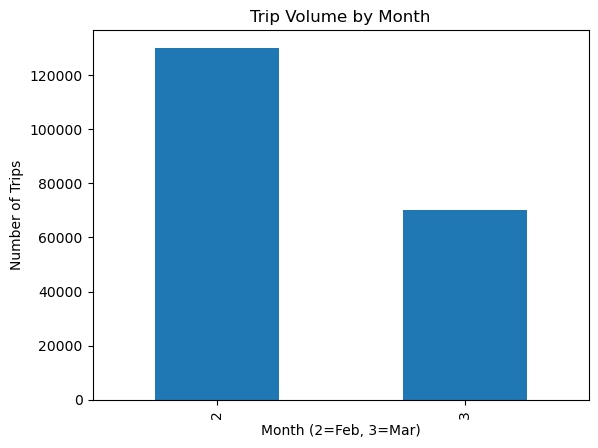

month
2    65.0
3    35.0
Name: proportion, dtype: float64

In [13]:
df['month'] = df['pickup_datetime'].dt.month

df['month'].value_counts().sort_index().plot(kind='bar')

plt.title("Trip Volume by Month")
plt.xlabel("Month (2=Feb, 3=Mar)")
plt.ylabel("Number of Trips")
plt.show()

# this shows the percentage by each months
df['month'].value_counts(normalize=True).sort_index().mul(100).round(1)

## Shared vs non-shared rides

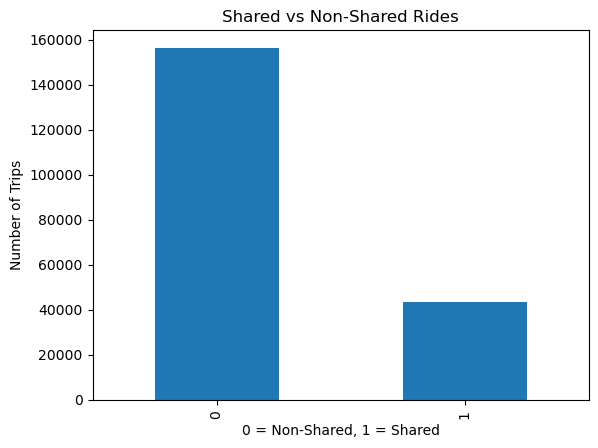

Shared vs Non-Shared Rides Summary:
Not Shared: 156424 trips (78.2%)
Shared: 43576 trips (21.8%)


In [14]:
# Bar chart 
df['SR_Flag'].value_counts().plot(kind='bar')
plt.title("Shared vs Non-Shared Rides")
plt.xlabel("0 = Non-Shared, 1 = Shared")
plt.ylabel("Number of Trips")
plt.show()

# Shows the percentage
counts = df['SR_Flag'].value_counts()
percentages = df['SR_Flag'].value_counts(normalize=True).mul(100).round(1)

print("Shared vs Non-Shared Rides Summary:")
for flag in counts.index:
    label = "Not Shared" if flag == 0 else "Shared"
    print(f"{label}: {counts[flag]} trips ({percentages[flag]}%)")

## Trip duration distribution

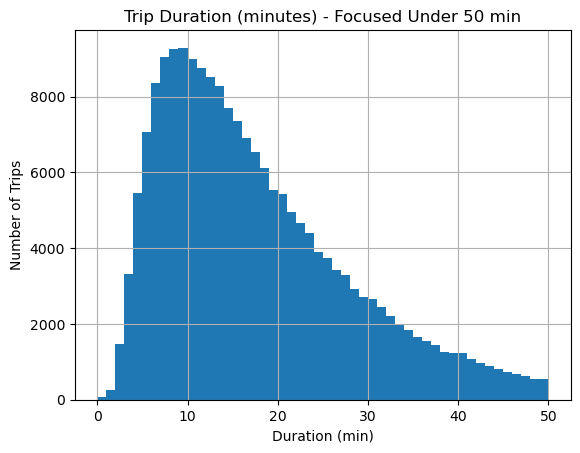

In [15]:
df[df['trip_duration'] < 50]['trip_duration'].hist(bins=50)
plt.title("Trip Duration (minutes) - Focused Under 50 min")
plt.xlabel("Duration (min)")
plt.ylabel("Number of Trips")
plt.show()

## Top pickup zones

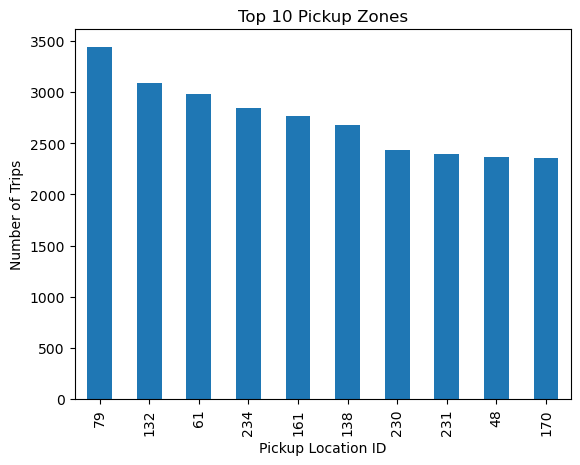

In [16]:
df['PULocationID'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Pickup Zones")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.show()

## Findings and Observations

- This dataset only covers February and March 2019.
- About 65% of trips took place in February, with the remaining 35% in March.
- 78% of trips were not shared, while 22% were shared rides, indicate most passengers chose solo.
- Most trips lasted under 50 minutes, with a sharp peak around 10-20 minutes.
- Pickup activity was heavily in a few key zones, such Zone 79 having the highest trip count.